# The House Price Prediction
## Team 4: Vicky Van Der Wagt, Halee Staggs, Bethany Wang

## 2. Data Importing and Cleaning

## 1. Introduction

* Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
* Clean, wrangle, and handle missing data
* Transform data appropriately using techniques such as aggregation, normalization, and feature construction
* Reduce redundant data and perform need-based discretization

In [283]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

### Import data

In [227]:
houses = pd.read_csv("house_sales.csv")
houses.shape

(21613, 21)

In [225]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [179]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check and Handle Missing Data

In [147]:
houses.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [248]:
dataset = houses.dropna()

### Separate Dependent Varible and Drop useless Data

In [249]:
warnings.filterwarnings('ignore')
dataset.drop(['id'], axis=1, inplace = True)

## 3. Data Analysis and Visualization

* Identify categorical, ordinal, and numerical variables within the data
* Provide measures of centrality and distribution with visualizations
* Diagnose for correlations between variables and determine independent and dependent variables
* Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In [250]:
# Identify categorical, ordinal, and numerical variables within the data

numerical_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 
                       'lat', 'long', 'sqft_living15', 'sqft_lot15']
ordinal_variables = ['condition', 'grade', 'yr_built', 'yr_renovated']
categorical_variables = ['date', 'waterfront', 'view', 'zipcode']


### Statistical and Correlation Analysis

In [251]:
numerical_subset = dataset[numerical_variables]

In [252]:
round(numerical_subset.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00,17618.00
mean,541643.73,3.38,2.11,2083.48,15140.85,1.49,1791.68,291.80,47.56,-122.21,1989.03,12771.22
std,368718.59,0.94,0.77,918.74,42288.64,0.54,829.75,442.93,0.14,0.14,686.52,27423.28
min,75000.00,0.00,0.00,370.00,520.00,1.00,370.00,0.00,47.16,-122.52,399.00,659.00
25%,323425.00,3.00,1.75,1430.00,5050.00,1.00,1190.00,0.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1920.00,7620.00,1.50,1570.00,0.00,47.57,-122.23,1840.00,7623.50
75%,646000.00,4.00,2.50,2550.00,10659.75,2.00,2220.00,560.00,47.68,-122.13,2370.00,10071.00
max,7700000.00,33.00,8.00,12050.00,1651359.00,3.50,8570.00,4820.00,47.78,-121.32,6210.00,871200.00


In [253]:
# Diagnose for correlations 
round(numerical_subset.corr(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.71,0.09,0.26,0.61,0.32,0.31,0.02,0.59,0.08
bedrooms,0.31,1.00,0.51,0.57,0.03,0.18,0.47,0.30,-0.01,0.13,0.39,0.03
bathrooms,0.53,0.51,1.00,0.76,0.08,0.50,0.69,0.28,0.03,0.23,0.57,0.09
sqft_living,0.71,0.57,0.76,1.00,0.17,0.36,0.88,0.43,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.08,0.17,1.00,-0.00,0.18,0.01,-0.08,0.23,0.14,0.72
floors,0.26,0.18,0.50,0.36,-0.00,1.00,0.53,-0.25,0.05,0.14,0.29,-0.01
sqft_above,0.61,0.47,0.69,0.88,0.18,0.53,1.00,-0.06,0.00,0.35,0.73,0.19
sqft_basement,0.32,0.30,0.28,0.43,0.01,-0.25,-0.06,1.00,0.11,-0.15,0.20,0.01
lat,0.31,-0.01,0.03,0.05,-0.08,0.05,0.00,0.11,1.00,-0.13,0.05,-0.08
long,0.02,0.13,0.23,0.24,0.23,0.14,0.35,-0.15,-0.13,1.00,0.33,0.26


<AxesSubplot:>

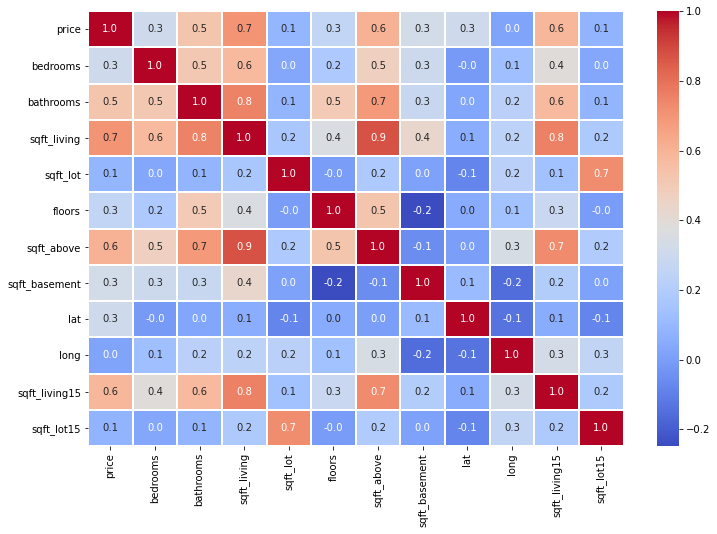

In [254]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_subset.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

From the statistical analysis table and the correlation heatmap, we see:
* some redundant variables, such as 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', they can be removed.
* The house with 33 bedrooms should be treated as outlier. Therefore, it can be removed.
* Price per square feet can be added

In [255]:
# Remove some redundant variables
warnings.filterwarnings('ignore')
dataset.drop(['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1, inplace = True)
numerical_subset.drop(['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1, inplace = True)

# Drop the outlier with the extreme values
dataset.drop(dataset[dataset.bedrooms > 20].index, inplace = True)
dataset.describe()

In [305]:
# Add two new columns 'price_per_sqft' and 'price_log' to facilitate analysis
dataset['price_per_sqft'] = dataset['price'] / dataset['sqft_living']
dataset['price_log'] = np.log(dataset['price'])
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price_per_sqft,price_log
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,188.050847,12.309982
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,209.338521,13.195614
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,233.766234,12.100712
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,308.163265,13.311329
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,303.571429,13.142166


### Histogram Distribution of the Dependent Variable

In [271]:
# Separate Prices into a new variable
prices = dataset['price']

# Define lists for plotting
bar_cols = ['view', 'waterfront', 'condition', 'grade', 'bedrooms', 'bathrooms']
scatter_cols = ['yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms', 'grade', 'floors']
pair_cols = ['sqft_living', 'sqft_lot', 'grade']

<AxesSubplot:title={'center':'Price Distribution-log'}, xlabel='price_log'>

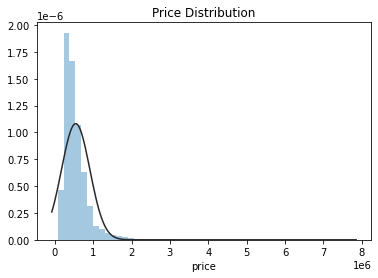

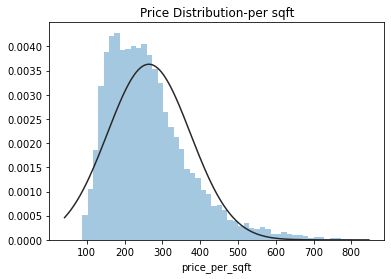

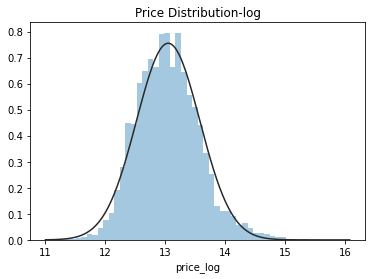

In [306]:
# Generate Histogram for Prices
plt.figure(1)
# plt.xlim(0,8000000)
# sns.histplot(prices, bins=10)
plt.title('Price Distribution')
sns.distplot(prices, kde=False, fit=stats.norm)
plt.figure(2)
plt.title('Price Distribution-per sqft')
sns.distplot(dataset['price_per_sqft'], kde=False, fit=stats.norm)
plt.figure(3)
plt.title('Price Distribution-log')
sns.distplot(dataset['price_log'], kde=False, fit=stats.norm)

### Distribution Analysis with Box Plot

<AxesSubplot:title={'center':'Boxplots'}>

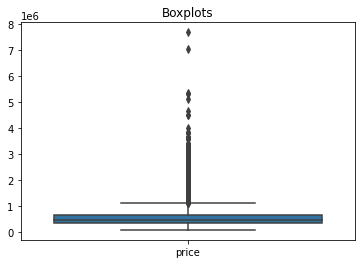

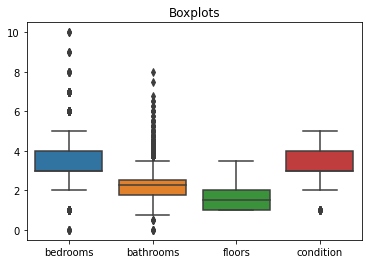

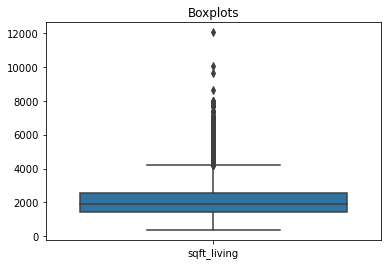

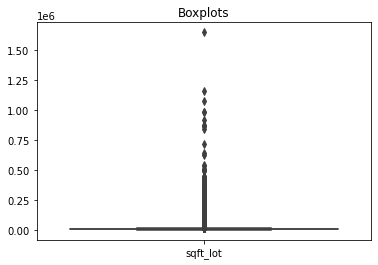

In [319]:
# Create box plots

plt.figure(1)
plt.title('Boxplots')
sns.boxplot(data = dataset[['price']])

plt.figure(2)
plt.title('Boxplots')
sns.boxplot(data = dataset[['bedrooms', 'bathrooms', 'floors', 'condition']])

plt.figure(3)
plt.title('Boxplots')
sns.boxplot(data = dataset[['sqft_living']])

plt.figure(4)
plt.title('Boxplots')
sns.boxplot(data = dataset[['sqft_lot']])

### Bar Plots for Categorical and Discrete Variables

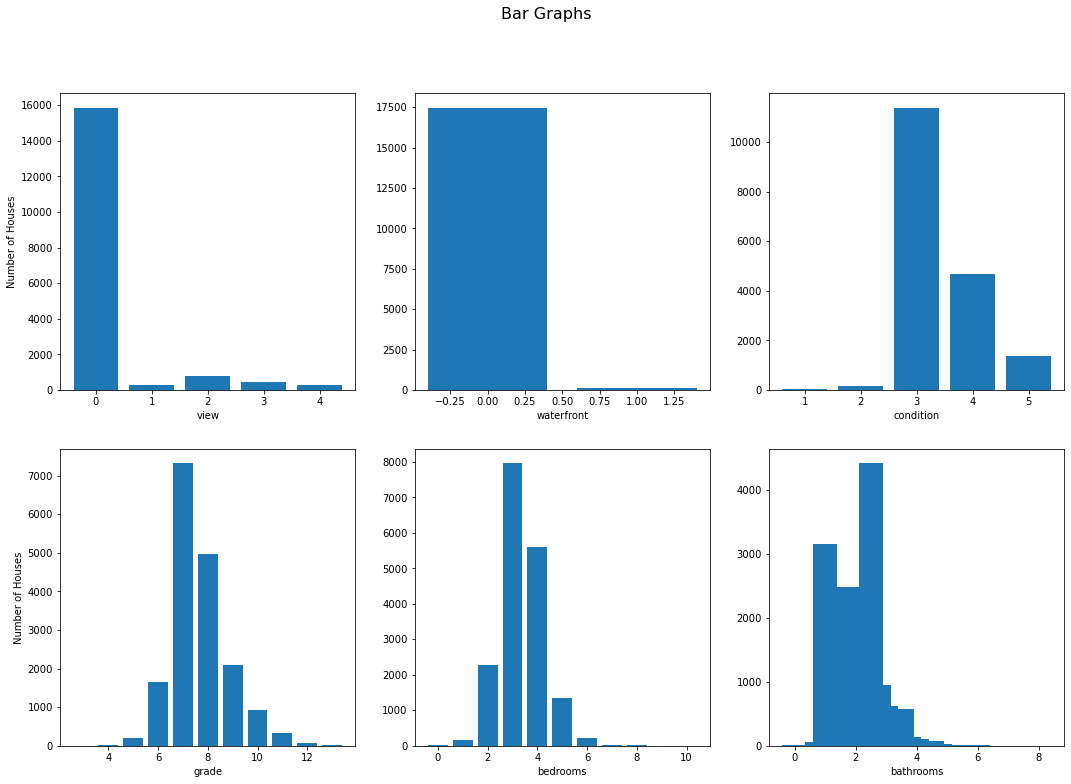

In [293]:
# Create bar plots
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(18,12))
fig.suptitle("Bar Graphs",fontsize=16)

for n in range(len(bar_cols)):
    i = 0 if n < 3 else 1  
    j = n % 3;
    values = dataset[bar_cols[n]].value_counts()
    pd.Series.sort_index(values, inplace=True)
    indexes = list(values.index)
    axes[i][j].bar(indexes, values)
    axes[i][j].set_xlabel(bar_cols[n])
    
axes[0][0].set_ylabel("Number of Houses")
axes[1][0].set_ylabel("Number of Houses")

plt.show()

### Scatter Plots for Numerical Variables vs. Price

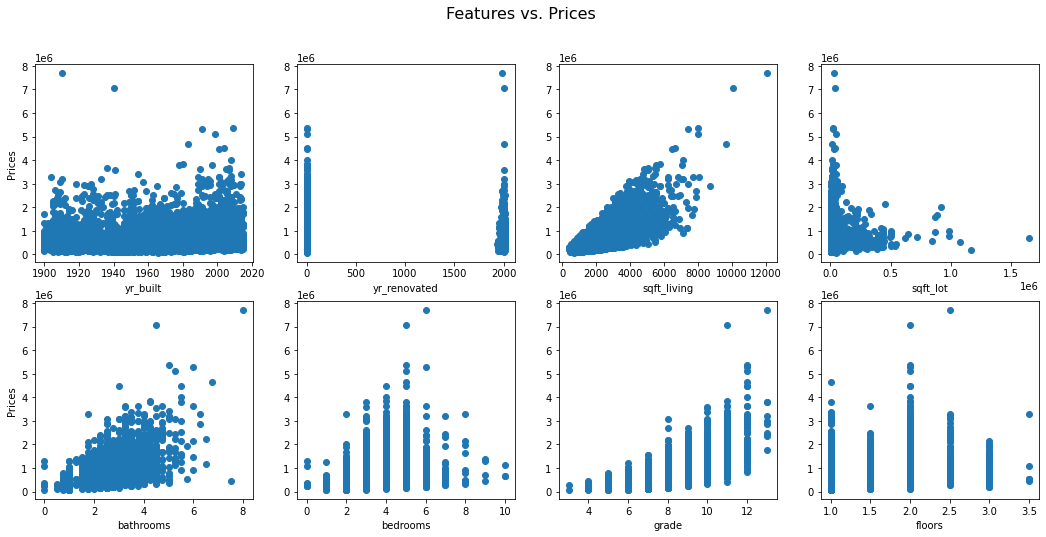

In [281]:
#Create scatter plots
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(18,8))
fig.suptitle("Features vs. Prices",fontsize=16)

for n in range(len(scatter_cols)):
    i = 0 if n < 4 else 1  
    j = n % 4;
    axes[i][j].scatter(dataset[scatter_cols[n]], prices)
    axes[i][j].set_xlabel(scatter_cols[n])
    
axes[0][0].set_ylabel("Prices")
axes[1][0].set_ylabel("Prices")

plt.show()

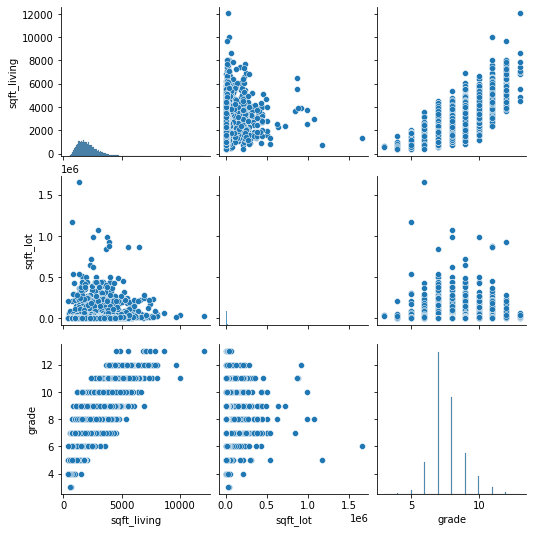

In [294]:
sns.pairplot(dataset[pair_columns])

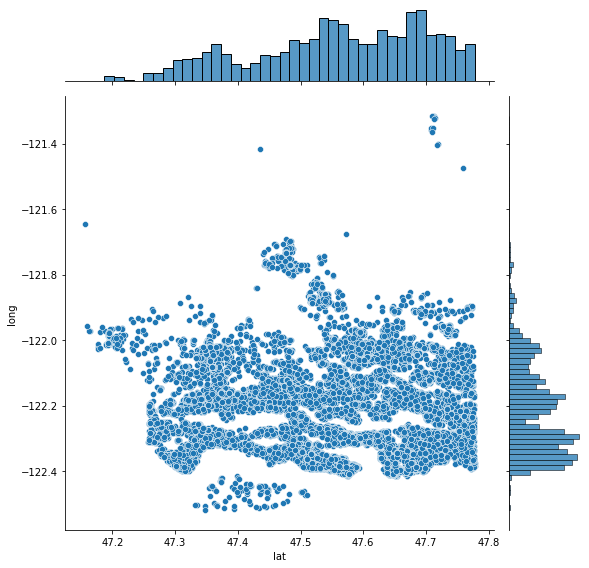

In [298]:
sns.jointplot(dataset['lat'], dataset['long'], size = 8)

#### Add somelines to test git

In [1]:
a = 10
b = 20
print(a + b)

30


## 4. Data Modeling and Analytics

* Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
* Train, test, and provide accuracy and evaluation metrics for model results


## 5. Conclusion

## References